# Kmeans Beer dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_csv("beer.csv")
df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


Before clustering the brands in segments, the features need to be normalized as these are on different
scales. So, the first step in creating clusters is to normalize the features in beer dataset.

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(df[["calories","sodium","alcohol","cost"]])

In [5]:
scaled_beer_df[0:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

As there are four features, it is not possible to plot and visualize them to understand how many clusters
may exist. For high-dimensional data, the following techniques can be used for discovering the possible
number of clusters:
1. Dendrogram
2. Elbow method

## 1) Dendrogram

A dendrogram is a cluster tree diagram which groups those entities together that are nearer to each
other. A dendrogram can be drawn using the clustermap() method in seaborn.

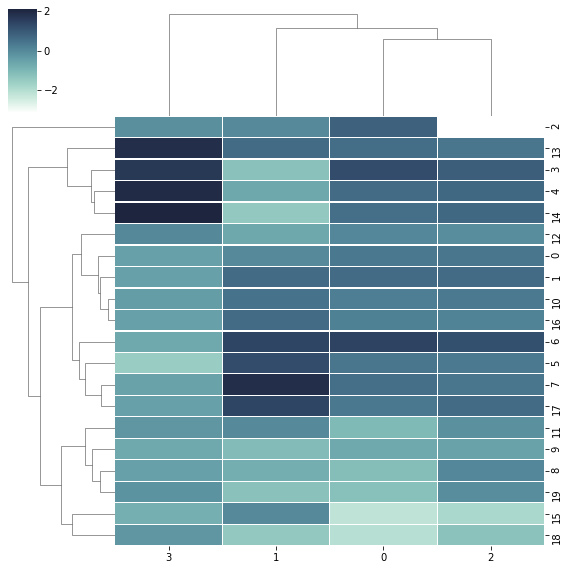

In [6]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2,figsize = (8,8))

In [7]:
# closest
df.iloc[[10,16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [8]:
# farthest
df.iloc[[2,18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


The tree structure on the left of the dendrogram indicates that there may be four or five clusters in
the dataset. This is only a guideline or indication about the number of clusters, but the actual number of
clusters can be determined only after creating the clusters and interpreting them. Creating more number
of clusters may give rise to the complexity of defining and managing them. It is always advisable to have
a less and reasonable number of clusters that make business sense. We will create four clusters and verify
if the clusters explain the product segments clearly and well.

## 2) Elbow Curve Method

If we assume all the products belong to only one segment, then the variance of the cluster will be highest.
As we increase the number of clusters, the total variance of all clusters will start reducing. But the total
variance will be zero if we assume each product is a cluster by itself. So, Elbow curve method consid-
ers the percentage of variance explained as a function of the number of clusters. The optimal number
of clusters is chosen in such a way that adding another cluster does not change the variance explained
significantly.

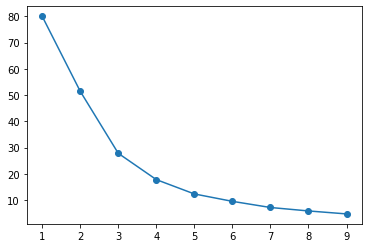

In [9]:
from sklearn.cluster import KMeans

cluster_range = range(1, 10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_beer_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker = "o");

The above figure indicates that the elbow point is at 3, which in turn indicates there might be three clusters
existing in the dataset

In [10]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(df[["calories","sodium","alcohol","cost"]])

In [11]:
k = 3
clusters = KMeans(k, random_state = 42)
clusters.fit(scaled_beer_df)
df["clusterid"] = clusters.labels_

In [12]:
df["clusterid"].unique()

array([0, 1, 2], dtype=int32)

In [13]:
df.head()

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,1
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2


In [14]:
df[df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [15]:
df[df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


In [16]:
df.drop([2],inplace = True)

In [17]:
df.head()

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
5,Old_Milwaukee,145,23,4.6,0.28,0


In [18]:
df[df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


In [19]:
df[df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2
